In [1]:
import sqlite3
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

In [2]:
cnx = sqlite3.connect('database.sqlite')
df = pd.read_sql_query("SELECT * FROM Player_Attributes", cnx)

In [3]:
df.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [4]:
df.shape

(183978, 42)

In [5]:
df.isnull().sum()

id                        0
player_fifa_api_id        0
player_api_id             0
date                      0
overall_rating          836
potential               836
preferred_foot          836
attacking_work_rate    3230
defensive_work_rate     836
crossing                836
finishing               836
heading_accuracy        836
short_passing           836
volleys                2713
dribbling               836
curve                  2713
free_kick_accuracy      836
long_passing            836
ball_control            836
acceleration            836
sprint_speed            836
agility                2713
reactions               836
balance                2713
shot_power              836
jumping                2713
stamina                 836
strength                836
long_shots              836
aggression              836
interceptions           836
positioning             836
vision                 2713
penalties               836
marking                 836
standing_tackle     

In [6]:
df.describe()

,id,player_fifa_api_id,player_api_id,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
count,183978.00000,183978.000000,183978.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000,181265.000000,...,181265.000000,183142.000000,183142.000000,183142.000000,181265.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000
mean,91989.50000,165671.524291,135900.617324,68.600015,73.460353,55.086883,49.921078,57.266023,62.429672,49.468436,...,57.873550,55.003986,46.772242,50.351257,48.001462,14.704393,16.063612,20.998362,16.132154,16.441439
std,53110.01825,53851.094769,136927.840510,7.041139,6.592271,17.242135,19.038705,16.488905,14.194068,18.256618,...,15.144086,15.546519,21.227667,21.483706,21.598778,16.865467,15.867382,21.452980,16.099175,17.198155
min,1.00000,2.000000,2625.000000,33.000000,39.000000,1.000000,1.000000,1.000000,3.000000,1.000000,...,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,45995.25000,155798.000000,34763.000000,64.000000,69.000000,45.000000,34.000000,49.000000,57.000000,35.000000,...,49.000000,45.000000,25.000000,29.000000,25.000000,7.000000,8.000000,8.000000,8.000000,8.000000
50%,91989.50000,183488.000000,77741.000000,69.000000,74.000000,59.000000,53.000000,60.000000,65.000000,52.000000,...,60.000000,57.000000,50.000000,56.000000,53.000000,10.000000,11.000000,12.000000,11.000000,11.000000
75%,137983.75000,199848.000000,191080.000000,73.000000,78.000000,68.000000,65.000000,68.000000,72.000000,64.000000,...,69.000000,67.000000,66.000000,69.000000,67.000000,13.000000,15.000000,15.000000,15.000000,15.000000
max,183978.00000,234141.000000,750584.000000,94.000000,97.000000,95.000000,97.000000,98.000000,97.000000,93.000000,...,97.000000,96.000000,96.000000,95.000000,95.000000,94.000000,93.000000,97.000000,96.000000,96.000000


In [7]:
df = df.drop(['id','player_fifa_api_id','player_api_id','date'],axis=1)

In [8]:
#Drop all Non-Null values
df.dropna(subset=['overall_rating', 'potential', 'preferred_foot', 'attacking_work_rate',
       'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes'], how='all', inplace=True)

In [9]:
df.isnull().sum()

overall_rating            0
potential                 0
preferred_foot            0
attacking_work_rate    2394
defensive_work_rate       0
crossing                  0
finishing                 0
heading_accuracy          0
short_passing             0
volleys                1877
dribbling                 0
curve                  1877
free_kick_accuracy        0
long_passing              0
ball_control              0
acceleration              0
sprint_speed              0
agility                1877
reactions                 0
balance                1877
shot_power                0
jumping                1877
stamina                   0
strength                  0
long_shots                0
aggression                0
interceptions             0
positioning               0
vision                 1877
penalties                 0
marking                   0
standing_tackle           0
sliding_tackle         1877
gk_diving                 0
gk_handling               0
gk_kicking          

In [10]:
# fill nan in df['attacking_work_rate']
df['attacking_work_rate'].fillna(method='ffill',inplace=True,axis=0)

In [11]:
#convert categorical into individual columns
attacking_work_rate_dummies = pd.get_dummies(df['attacking_work_rate'],prefix='attacking_work_rate').iloc[:, 1:]
attacking_work_rate_dummies.head(2)

,attacking_work_rate_high,attacking_work_rate_le,attacking_work_rate_low,attacking_work_rate_medium,attacking_work_rate_norm,attacking_work_rate_stoc,attacking_work_rate_y
0,0,0,0,1,0,0,0
1,0,0,0,1,0,0,0


In [12]:
# fill nan in df['volleys']
df['volleys'].fillna((df['volleys'].mean()), inplace=True)
df['volleys'].isnull().sum()

0

In [13]:
# fill nan in df['curve']
df['curve'].fillna((df['curve'].mean()), inplace=True)
df['curve'].isnull().sum()

0

In [14]:
# fill nan in df['agility']
df['agility'].fillna((df['agility'].mean()), inplace=True)
df['agility'].isnull().sum()

0

In [15]:
# fill nan in df['balance']
df['balance'].fillna((df['balance'].mean()), inplace=True)
df['balance'].isnull().sum()

0

In [16]:
# fill nan in df['jumping']
df['jumping'].fillna((df['jumping'].mean()), inplace=True)
df['jumping'].isnull().sum()

0

In [17]:
# fill nan in df['vision']
df['vision'].fillna((df['vision'].mean()), inplace=True)
df['vision'].isnull().sum()

0

In [18]:
# fill nan in df['sliding_tackle']
df['sliding_tackle'].fillna((df['sliding_tackle'].mean()), inplace=True)
df['sliding_tackle'].isnull().sum()

0

In [19]:
df.isnull().sum()

overall_rating         0
potential              0
preferred_foot         0
attacking_work_rate    0
defensive_work_rate    0
crossing               0
finishing              0
heading_accuracy       0
short_passing          0
volleys                0
dribbling              0
curve                  0
free_kick_accuracy     0
long_passing           0
ball_control           0
acceleration           0
sprint_speed           0
agility                0
reactions              0
balance                0
shot_power             0
jumping                0
stamina                0
strength               0
long_shots             0
aggression             0
interceptions          0
positioning            0
vision                 0
penalties              0
marking                0
standing_tackle        0
sliding_tackle         0
gk_diving              0
gk_handling            0
gk_kicking             0
gk_positioning         0
gk_reflexes            0
dtype: int64

In [20]:
# creating dummies to object datatype dataset
preferred_foot_dummies = pd.get_dummies(df['preferred_foot'],prefix='preferred_foot')
preferred_foot_dummies.head(2)

,preferred_foot_left,preferred_foot_right
0,0,1
1,0,1


In [21]:
df['defensive_work_rate'].value_counts()

medium    130846
high       27041
low        18432
_0          2394
o           1550
1            441
ormal        348
2            342
3            258
5            234
7            217
0            197
6            197
9            152
4            116
es           106
ean          104
tocky         89
8             78
Name: defensive_work_rate, dtype: int64

In [22]:
defensive_work_rate_dummies = pd.get_dummies(df['defensive_work_rate'],prefix='defensive_work_rate').iloc[:, 1:]
defensive_work_rate_dummies.head(2)

,defensive_work_rate_1,defensive_work_rate_2,defensive_work_rate_3,defensive_work_rate_4,defensive_work_rate_5,defensive_work_rate_6,defensive_work_rate_7,defensive_work_rate_8,defensive_work_rate_9,defensive_work_rate__0,defensive_work_rate_ean,defensive_work_rate_es,defensive_work_rate_high,defensive_work_rate_low,defensive_work_rate_medium,defensive_work_rate_o,defensive_work_rate_ormal,defensive_work_rate_tocky
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [23]:
attacking_work_rate_dummies = pd.get_dummies(df['attacking_work_rate'],prefix='attacking_work_rate').iloc[:, 1:]
attacking_work_rate_dummies.head(2)

,attacking_work_rate_high,attacking_work_rate_le,attacking_work_rate_low,attacking_work_rate_medium,attacking_work_rate_norm,attacking_work_rate_stoc,attacking_work_rate_y
0,0,0,0,1,0,0,0
1,0,0,0,1,0,0,0


In [24]:
df = df.drop(['preferred_foot','attacking_work_rate','defensive_work_rate'],axis=1)

In [25]:
df = pd.concat([df, attacking_work_rate_dummies,defensive_work_rate_dummies,preferred_foot_dummies], axis=1)

In [26]:
# Linear Regression

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline

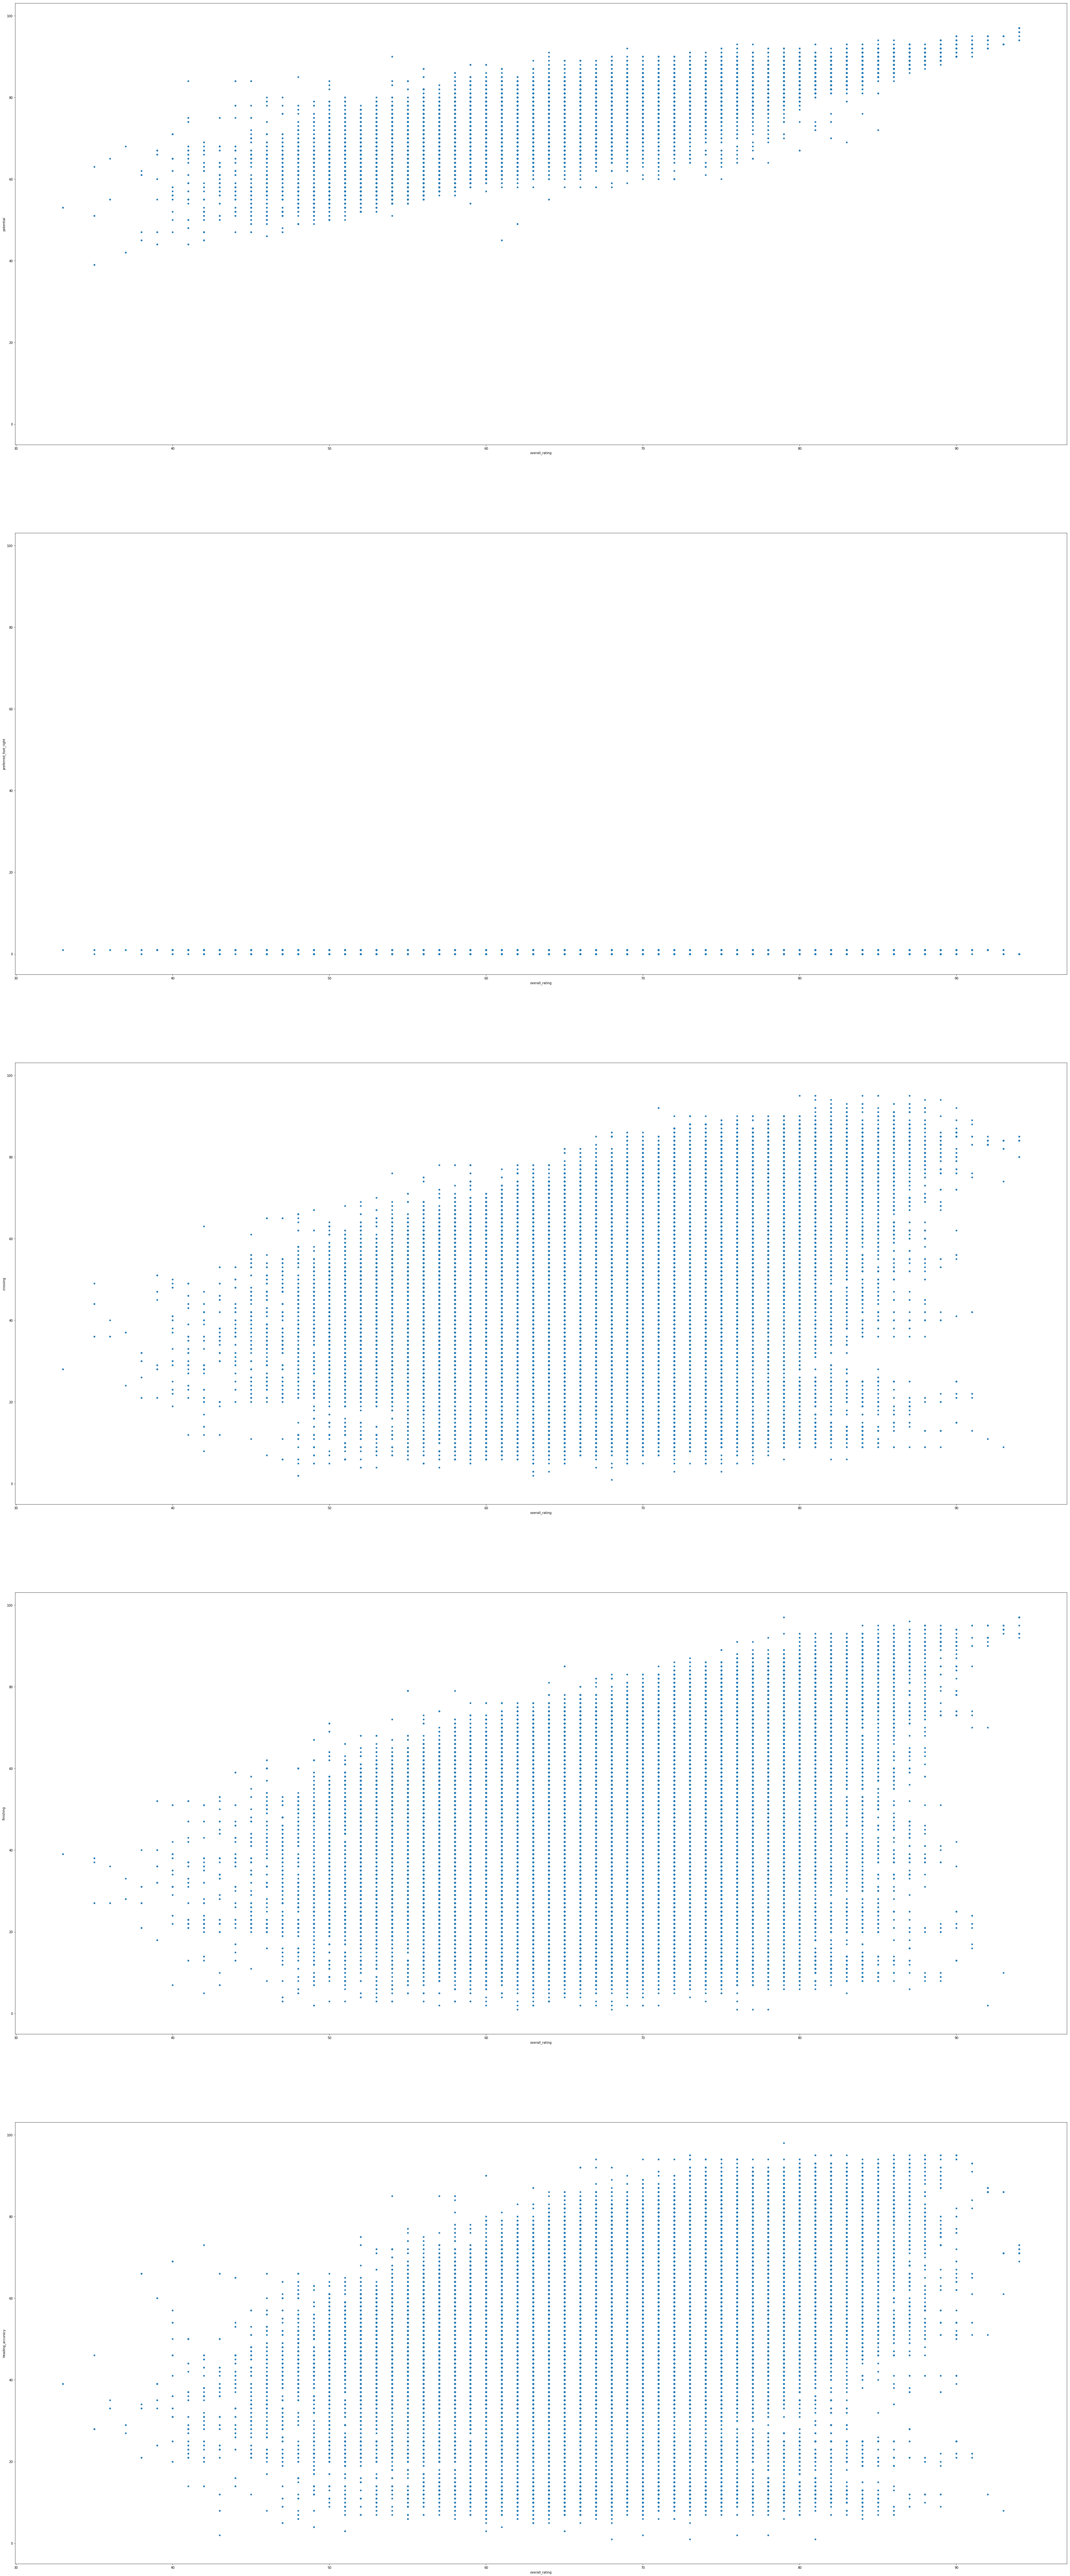

In [28]:
# Data Visualisation
fig, axs = plt.subplots(5, 1, sharey=True)
df.plot(kind='scatter', x='overall_rating', y='potential', ax=axs[0], figsize=(60, 150))
df.plot(kind='scatter', x='overall_rating', y='preferred_foot_right', ax=axs[1])
df.plot(kind='scatter', x='overall_rating', y='crossing', ax=axs[2])
df.plot(kind='scatter', x='overall_rating', y='finishing', ax=axs[3])
df.plot(kind='scatter', x='overall_rating', y='heading_accuracy', ax=axs[4])

In [29]:
from sklearn.linear_model import LinearRegression
linear = LinearRegression()
df1 = ['potential', 'crossing', 'finishing',
       'heading_accuracy', 'short_passing', 'volleys', 'dribbling', 'curve',
       'free_kick_accuracy', 'long_passing', 'ball_control', 'acceleration',
       'sprint_speed', 'agility', 'reactions', 'balance', 'shot_power',
       'jumping', 'stamina', 'strength', 'long_shots', 'aggression',
       'interceptions', 'positioning', 'vision', 'penalties', 'marking',
       'standing_tackle', 'sliding_tackle', 'gk_diving', 'gk_handling',
       'gk_kicking', 'gk_positioning', 'gk_reflexes',
       'attacking_work_rate_high', 'attacking_work_rate_le',
       'attacking_work_rate_low', 'attacking_work_rate_medium',
       'attacking_work_rate_norm', 'attacking_work_rate_stoc',
       'attacking_work_rate_y', 'defensive_work_rate_1',
       'defensive_work_rate_2', 'defensive_work_rate_3',
       'defensive_work_rate_4', 'defensive_work_rate_5',
       'defensive_work_rate_6', 'defensive_work_rate_7',
       'defensive_work_rate_8', 'defensive_work_rate_9',
       'defensive_work_rate__0', 'defensive_work_rate_ean',
       'defensive_work_rate_es', 'defensive_work_rate_high',
       'defensive_work_rate_low', 'defensive_work_rate_medium',
       'defensive_work_rate_o', 'defensive_work_rate_ormal',
       'defensive_work_rate_tocky', 'preferred_foot_right','preferred_foot_left']
df1 = df[df1]
target = df['overall_rating']

#### Model Evaluation Using Linear Regression

In [30]:
y = df['overall_rating']
X = df.drop(['overall_rating'],axis=1)

In [31]:
# evaluate the model by splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [32]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [33]:
# predict class labels for the test set
y_pred = lm.predict(X_test)
y_pred

array([ 76.10050054,  68.44717868,  77.28863961, ...,  68.85187683,
        62.73175997,  67.78733507])

In [34]:
lm.score(X_test,y_test)

0.84538556925384667

#### Linear Regression Using Cross-Validation

In [35]:
import numpy as np
from sklearn.model_selection import cross_val_score
scores = cross_val_score(LinearRegression(), X, y, cv=10)
print(scores)
print(np.mean(scores))

[ 0.8487039   0.84344208  0.83602098  0.83913371  0.84384047  0.840643
  0.85003238  0.83501933  0.84376912  0.84633602]
0.842694099102


We got 84.26% accuracy which is a stable accuracy for Linear Regression

## Building Model using Decision Tree Regressor

In [40]:
dr = DecisionTreeRegressor(max_depth=10)
dr.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=10, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [41]:
y_pred_dr = dr.predict(X_test)
dr.score(X_test,y_test)

0.90105642451009804

## DecisionTreeRegressor with Cross Validation

In [42]:
scores = cross_val_score(DecisionTreeRegressor(max_depth=10), X, y, cv=10)
print(scores)
print(np.mean(scores))

[ 0.88955247  0.8802939   0.88073347  0.88058845  0.88006673  0.88114831
  0.8904859   0.87487632  0.88095296  0.89007906]
0.882877756587


So,we got 88.2% of accuracy better than Linear Regression using DecisionTrees